# Daily Corn Price Forecasting using Linear Regression

In [1]:
# Project 3      
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime 
import plotly.express as px
import os
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
import hvplot.pandas
from sklearn.linear_model import LinearRegression

## 1. Data Import and Cleanup

In [2]:
# Read in corn actual price and sort by date
corn_act_prices = pd.read_csv(Path("../Resources/combined_portfolios_df.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index()
# Dropping Natural Gas and Corn Future
corn_act_prices = corn_act_prices.drop(columns=["Natural_Gas_future", "Corn_future"])
corn_act_prices.head(2), corn_act_prices.tail(2)

(            Corn_Price  USD_Index  Ethanol_future  avg_prcp    avg_max  \
 Date                                                                     
 2005-03-28      2.1275  84.620003           1.230  4.255071  14.112571   
 2005-03-29      2.1300  84.320000           1.225  2.576857  18.172214   
 
              avg_min  
 Date                  
 2005-03-28  1.306000  
 2005-03-29  3.058357  ,
             Corn_Price  USD_Index  Ethanol_future  avg_prcp   avg_max  \
 Date                                                                    
 2019-12-30      3.8825  96.739998           1.382  10.56000  8.928214   
 2019-12-31      3.8775  96.389999           1.375   0.54246  2.055286   
 
              avg_min  
 Date                  
 2019-12-30  0.042619  
 2019-12-31 -2.547857  )

In [3]:
# Drop nulls from Corn DataFrame
corn_act_prices.dropna(inplace=True)

## 2. Understanding the Dataset

In [4]:
corn_act_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3657 entries, 2005-03-28 to 2019-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Corn_Price      3657 non-null   float64
 1   USD_Index       3657 non-null   float64
 2   Ethanol_future  3657 non-null   float64
 3   avg_prcp        3657 non-null   float64
 4   avg_max         3657 non-null   float64
 5   avg_min         3657 non-null   float64
dtypes: float64(6)
memory usage: 200.0 KB


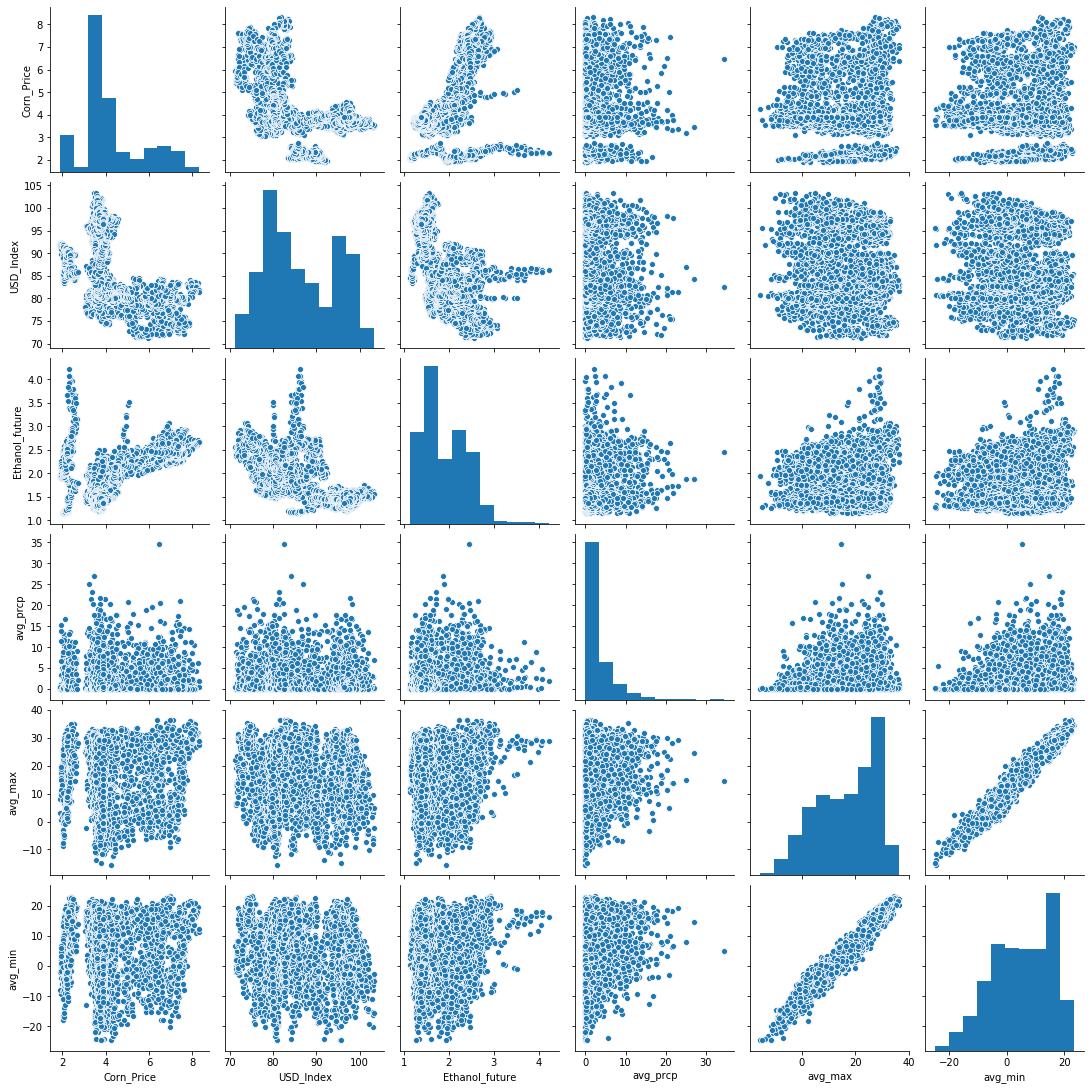

In [5]:
# Looking at the datasets with respect to each variable in pairs
sns.pairplot(corn_act_prices)

In [6]:
# Checking datasets size
corn_act_prices.shape

(3657, 6)

In [7]:
#Display Sample Data
corn_act_prices.tail()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min
Date,,,,,,
2019-12-23,3.8875,97.680000,1.388,0.00000,10.953690,-2.661786
2019-12-26,3.8850,97.589996,1.403,0.00000,12.979286,0.127262
2019-12-27,3.9000,96.919998,1.386,0.05250,10.943333,-0.555833
2019-12-30,3.8825,96.739998,1.382,10.56000,8.928214,0.042619
2019-12-31,3.8775,96.389999,1.375,0.54246,2.055286,-2.547857


## 3. Preparing Data for future forecasting

In [8]:
# Creating a lag of 90 days to predict for future three months
corn_act_prices['Corn_Price_3Mo_Forward']=corn_act_prices['Corn_Price'].shift(-90)
corn_act_prices.head(10)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,Corn_Price_3Mo_Forward
Date,,,,,,,
2005-03-28,2.1275,84.620003,1.230,4.255071,14.112571,1.306000,2.2700
2005-03-29,2.1300,84.320000,1.225,2.576857,18.172214,3.058357,2.2450
2005-03-30,2.1250,84.290001,1.215,1.493571,20.439500,5.811500,2.2050
2005-03-31,2.1300,84.059998,1.230,3.674524,19.387071,4.848714,2.2200
2005-04-01,2.1275,84.430000,1.215,1.049500,15.029214,1.856000,2.1875
2005-04-04,2.0975,84.779999,1.200,0.045000,20.926786,3.845429,2.2300
2005-04-05,2.0550,84.660004,1.205,0.000000,23.745071,6.942643,2.2500
2005-04-06,2.0725,84.680000,1.200,0.668500,22.666857,9.153214,2.1775
2005-04-07,2.0550,84.870003,1.160,3.851190,21.097643,7.468571,2.1050


In [9]:
#Preparing the data for future forecast of 90 days
forecast_90 = corn_act_prices[-90:]
forecast_90.head(2)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,Corn_Price_3Mo_Forward
Date,,,,,,,
2019-08-21,3.6250,98.300003,1.350,12.215833,29.596000,18.864643,NaN
2019-08-22,3.6325,98.169998,1.338,3.346111,26.771937,17.474675,NaN


In [10]:
# Dropping NUll values
corn_act_prices=corn_act_prices.dropna()
corn_act_prices.head()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,Corn_Price_3Mo_Forward
Date,,,,,,,
2005-03-28,2.1275,84.620003,1.230,4.255071,14.112571,1.306000,2.2700
2005-03-29,2.1300,84.320000,1.225,2.576857,18.172214,3.058357,2.2450
2005-03-30,2.1250,84.290001,1.215,1.493571,20.439500,5.811500,2.2050
2005-03-31,2.1300,84.059998,1.230,3.674524,19.387071,4.848714,2.2200
2005-04-01,2.1275,84.430000,1.215,1.049500,15.029214,1.856000,2.1875


In [11]:
#Display sample
corn_act_prices.tail()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,Corn_Price_3Mo_Forward
Date,,,,,,,
2019-08-14,3.5900,97.989998,1.255,1.837500,28.551429,16.864500,3.8875
2019-08-15,3.6075,98.139999,1.268,1.589857,27.099000,15.828857,3.8850
2019-08-16,3.7100,98.139999,1.303,2.412500,26.980175,16.012929,3.9000
2019-08-19,3.6500,98.349998,1.291,4.843889,29.470460,17.907675,3.8825
2019-08-20,3.5950,98.190002,1.302,4.440278,30.551905,19.103135,3.8775


In [12]:
# Data checks
corn_act_prices.shape

(3567, 7)

## 4. Prepare the Features (X) and the Target (y)

In [29]:
# Train Test Split of 80% 20%
train = corn_act_prices.loc['2005-03-28':'2016-09-30']
test = corn_act_prices.loc['2016-10-1':]
train.shape, train.tail(2), test.shape, test.head(2)

((2852, 7),
             Corn_Price  USD_Index  Ethanol_future  avg_prcp    avg_max  \
 Date                                                                     
 2016-09-29      3.2925  95.540001           1.540  4.845333  19.266857   
 2016-09-30      3.3675  95.459999           1.547  3.868167  20.421071   
 
               avg_min  Corn_Price_3Mo_Forward  
 Date                                           
 2016-09-29   8.881071                   3.745  
 2016-09-30  10.617714                   3.755  ,
 (715, 7),
             Corn_Price  USD_Index  Ethanol_future  avg_prcp    avg_max  \
 Date                                                                     
 2016-10-03      3.4600  95.750000           1.570  0.472310  21.617143   
 2016-10-04      3.4825  96.120003           1.602  1.551429  22.484357   
 
               avg_min  Corn_Price_3Mo_Forward  
 Date                                           
 2016-10-03  11.213643                  3.7425  
 2016-10-04  11.578214       

In [14]:
# Create dataframes for X_train and X_test, series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train.drop(columns=["Corn_Price_3Mo_Forward"])
X_test = test.drop(columns=["Corn_Price_3Mo_Forward"])

y_train = train["Corn_Price_3Mo_Forward"]
y_test = test["Corn_Price_3Mo_Forward"]

In [15]:
# Display Samples
X_train.head(3)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min
Date,,,,,,
2005-03-28,2.1275,84.620003,1.230,4.255071,14.112571,1.306000
2005-03-29,2.1300,84.320000,1.225,2.576857,18.172214,3.058357
2005-03-30,2.1250,84.290001,1.215,1.493571,20.439500,5.811500


In [16]:
# Display some samples
y_train[:3], y_test[:3]

(Date
 2005-03-28    2.270
 2005-03-29    2.245
 2005-03-30    2.205
 Name: Corn_Price_3Mo_Forward, dtype: float64,
 Date
 2016-10-03    3.7425
 2016-10-04    3.7875
 2016-10-05    3.7350
 Name: Corn_Price_3Mo_Forward, dtype: float64)

In [17]:
# Display Samples
X_test.head(3)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min
Date,,,,,,
2016-10-03,3.4600,95.750000,1.570,0.472310,21.617143,11.213643
2016-10-04,3.4825,96.120003,1.602,1.551429,22.484357,11.578214
2016-10-05,3.4775,96.129997,1.602,1.718571,24.058786,11.754619


In [18]:
# Data Checks
y_train.dtype, y_test.dtype

(dtype('float64'), dtype('float64'))

## 5. Linear Regression Model Development

In [19]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[ 0.7315333  -0.03560825 -0.31764788 -0.008645    0.0100255  -0.01634208]
4.806908879638461


## 6. Future Forecast

In [20]:
#Looking at the model parameters in dataframe
pd.DataFrame(model.coef_, X_train.columns, columns = ['Coeff'])

,Coeff
Corn_Price,0.731533
USD_Index,-0.035608
Ethanol_future,-0.317648
avg_prcp,-0.008645
avg_max,0.010026
avg_min,-0.016342


In [21]:
# Next 90 days prediction
forecast_90 = forecast_90.drop(columns=["Corn_Price_3Mo_Forward"])
predictions_90 = model.predict(forecast_90)
predictions_90

array([3.41242229, 3.49743084, 3.53394108, 3.43405033, 3.47350049,
       3.59667375, 3.61654388, 3.58325563, 3.50690243, 3.55066149,
       3.56789377, 3.54460264, 3.45925093, 3.52936623, 3.44652299,
       3.49891104, 3.53521036, 3.60377883, 3.57798419, 3.60179689,
       3.62691004, 3.58737567, 3.55825252, 3.67801056, 3.62019719,
       3.60327231, 3.60309352, 3.54424452, 3.6626405 , 3.60212718,
       3.62785491, 3.74416176, 3.71171263, 3.82338588, 3.79625188,
       3.68101648, 3.79551932, 3.88828309, 3.88801673, 3.84173005,
       3.85446913, 3.88314715, 3.74512013, 3.72868397, 3.81357892,
       3.82111856, 3.78033685, 3.78584673, 3.78163249, 3.76930824,
       3.73242019, 3.83337767, 3.78934934, 3.74853011, 3.7785473 ,
       3.77050866, 3.7797694 , 3.73615823, 3.81504715, 3.7870417 ,
       3.76822717, 3.73592868, 3.66448025, 3.67638209, 3.65615333,
       3.63102142, 3.67972898, 3.67247539, 3.65306544, 3.55405758,
       3.74575231, 3.73962246, 3.7270118 , 3.78953996, 3.78493

In [22]:
daily_forecast =  pd.DataFrame(predictions_90, columns = ['Corn Price Forecast'])
daily_forecast.to_csv("../Resources/daily_forecast.csv")

## 7. Make predictions using the Testing Data
Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [23]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)
predictions

array([3.45920186, 3.44572892, 3.45317203, 3.38152039, 3.39983111,
       3.45144446, 3.36606396, 3.49538884, 3.52118047, 3.41812898,
       3.43385968, 3.47927009, 3.32212763, 3.37602202, 3.46462488,
       3.44490567, 3.4171302 , 3.41317697, 3.45054558, 3.43376369,
       3.45383104, 3.41878465, 3.39601871, 3.52392552, 3.4712365 ,
       3.52834652, 3.41747852, 3.45555714, 3.39396518, 3.40094187,
       3.36784915, 3.35787275, 3.32098981, 3.38532339, 3.39242807,
       3.27060821, 3.30152505, 3.28504434, 3.24151662, 3.2768421 ,
       3.24956829, 3.28400802, 3.3677184 , 3.43502066, 3.43611289,
       3.40971433, 3.41380103, 3.41760815, 3.47805318, 3.48118415,
       3.43331015, 3.42522788, 3.46335343, 3.42548168, 3.34384161,
       3.32443062, 3.28540999, 3.37768683, 3.30476713, 3.30246772,
       3.35453205, 3.27017666, 3.46853356, 3.50492344, 3.49792171,
       3.52740781, 3.46567159, 3.47027737, 3.47926397, 3.4844086 ,
       3.42907251, 3.48491046, 3.47112669, 3.42219624, 3.54057

In [24]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions
Results.head(3)

,Corn_Price_3Mo_Forward,Predicted Return
Date,,
2016-10-03,3.7425,3.459202
2016-10-04,3.7875,3.445729
2016-10-05,3.7350,3.453172


In [25]:
# Display top 3 rows
Results.head(3), Results.tail(3)

(            Corn_Price_3Mo_Forward  Predicted Return
 Date                                                
 2016-10-03                  3.7425          3.459202
 2016-10-04                  3.7875          3.445729
 2016-10-05                  3.7350          3.453172,
             Corn_Price_3Mo_Forward  Predicted Return
 Date                                                
 2019-08-16                  3.9000          3.600357
 2019-08-19                  3.8825          3.525782
 2019-08-20                  3.8775          3.482546)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AD08C25708>,
      dtype=object)

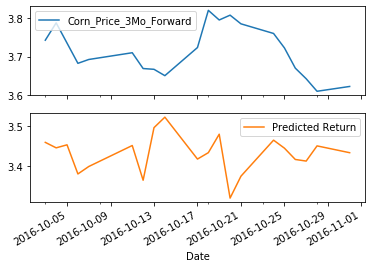

In [26]:
# Plot the first 20 predictions against the true values to see how it performed
# The trends lines should be similar
Results[:20].plot(subplots=True)

## 8. Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
mse = mean_squared_error(Results["Corn_Price_3Mo_Forward"],Results["Predicted Return"])
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)

# Print the mser, rmse, and standard deviation
print(f"Mean Squared Error (MSE): {mse}")
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(Results.Corn_Price_3Mo_Forward)}")

Mean Squared Error (MSE): 0.07278942750756631
Out-of-Sample Root Mean Squared Error (RMSE): 0.2697951584212851
Standard Deviation of Futures Return: 0.2124128983346886


## 9. In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [28]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(in_sample_results["Corn_Price_3Mo_Forward"],in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)

# Print the mser, rmse, and standard deviation
print(f"Mean Squared Error (MSE): {mse}")
print(f"In-sample Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(in_sample_results.Corn_Price_3Mo_Forward)}")

Mean Squared Error (MSE): 0.07278942750756631
In-sample Root Mean Squared Error (RMSE): 0.2697951584212851
Standard Deviation of Futures Return: 1.5223076039328485
